## **Binary Classification with Decission Tree**

**Definisi**: Decision Tree adalah algoritma klasifikasi yang membangun model berbentuk pohon keputusan. Setiap node pada pohon mewakili keputusan berdasarkan fitur, dan cabang mewakili hasil dari keputusan tersebut.

**Pendekatan**: Algoritma ini memilih fitur yang paling banyak membagi data ke dalam subset yang lebih homogen berdasarkan impuritas (misalnya, entropy atau Gini impurity).

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# dataset for Binary classification
from sklearn.datasets import load_breast_cancer

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Model
from sklearn.tree import DecisionTreeClassifier

# metrics for evalution classification task
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, f1_score, classification_report

import warnings
warnings.filterwarnings("ignore")

In [8]:
data = load_breast_cancer()

print(data["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [9]:
# Load Dataset
X, y = load_breast_cancer(return_X_y=True)

X.shape, y.shape

((569, 30), (569,))

In [10]:
# split data into Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [11]:
# Standarisation data
SC = StandardScaler()

X_train_scaled = SC.fit_transform(X_train, y_train)
X_test_scaled = SC.transform(X_test)

In [12]:
# train model
Dtc = DecisionTreeClassifier()

Dtc.fit(X_train_scaled, y_train)

print(Dtc.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


Accuracy Score : 0.9473684210526315
F1 Score : 0.9577464788732394
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



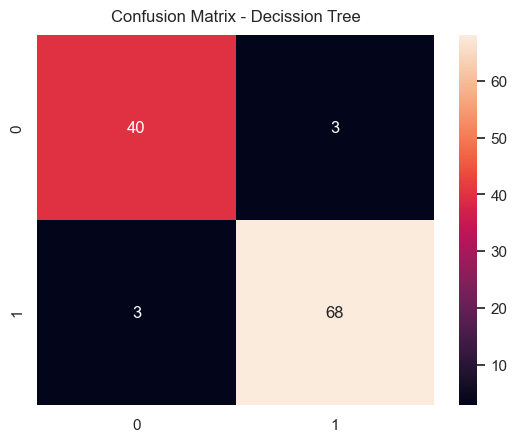

In [13]:
# evalution Model

y_pred = Dtc.predict(X_test_scaled)
y_proba = Dtc.predict_proba(X_test_scaled)[:,1]

# metrics classification
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
conf_matrix= confusion_matrix(y_test, y_pred)


# print metrics
print(f"Accuracy Score : {acc}")
print(f"F1 Score : {f1}")
print(clf_report)


# plot confusion matrix & ROC Curve
sns.set()

# confusion matrix
sns.heatmap(data=conf_matrix, annot=True)
plt.title(f"Confusion Matrix - Decission Tree", fontsize=12, pad=10)
plt.show()


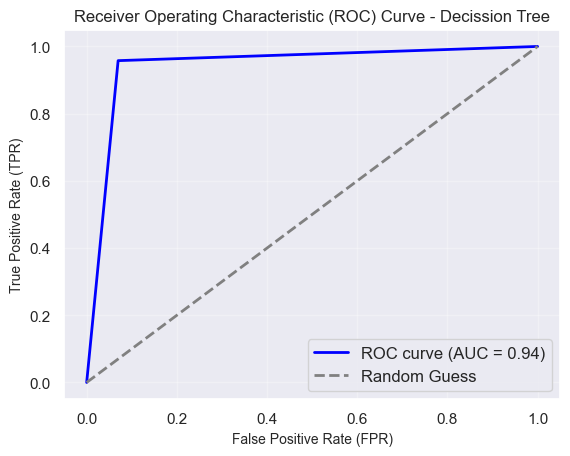

In [14]:
# ROC plot
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", lw=2, label="Random Guess")

plt.xlabel("False Positive Rate (FPR)", fontsize=10)
plt.ylabel("True Positive Rate (TPR)", fontsize=10)
plt.title("Receiver Operating Characteristic (ROC) Curve - Decission Tree", fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

